In [12]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query10a = """
    SELECT
    selectsystems.record_id,
    cast(selectsystems.created as date),
    cast(selectsystems.status_last_modified as date),
    selectsystems.status,
    selectsystems.billing_style    
    FROM 
    selectsystems 
    WHERE selectsystems.billing_style = 'Flat Rate' and selectsystems.status = 'Inactive' 
"""
dataset10a = sqlio.read_sql_query(query10a,conn)
df10a = pd.DataFrame(data=dataset10a)
df10a.to_csv('analysis10a.csv')
print(df10a)


    record_id     created status_last_modified    status billing_style
0          18  2021-02-23           2021-05-11  Inactive     Flat Rate
1          61  2021-07-29           2022-04-27  Inactive     Flat Rate
2         144  2021-12-07           2022-01-17  Inactive     Flat Rate
3         117  2021-10-19           2022-04-27  Inactive     Flat Rate
4         106  2021-09-15           2022-01-04  Inactive     Flat Rate
5          82  2021-08-27           2022-04-27  Inactive     Flat Rate
6          91  2021-08-27           2022-04-27  Inactive     Flat Rate
7          11  2021-02-17           2021-02-17  Inactive     Flat Rate
8          78  2021-08-27           2021-08-27  Inactive     Flat Rate
9         101  2021-09-14           2022-04-27  Inactive     Flat Rate
10         20  2021-03-02           2021-10-19  Inactive     Flat Rate
11          9  2021-02-17           2021-02-17  Inactive     Flat Rate
12        116  2021-10-08           2022-06-01  Inactive     Flat Rate
13    

  Unnamed: 0  Hourly  Retainer  Flat Rate
0  Retention      47        24         32
1      Churn      53        76         68


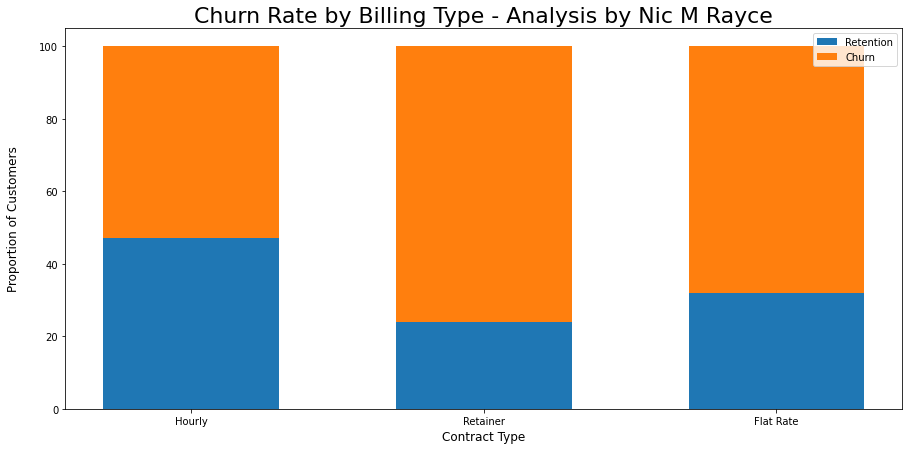

In [33]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")

df10b = pd.read_csv('retention_churn_bybillingtype.csv')
print(df10b)

xdata=['Hourly','Retainer','Flat Rate']
ydata=['Retention', 'Churn']
ydata1=[47,24,32]
ydata2=[53,76,68]

# Define width of stacked chart

w = 0.6

# Plot stacked bar chart
plt.figure(figsize=(15,7))
plt.bar(xdata, ydata1, w)
plt.bar(xdata, ydata2, w, bottom=ydata1)
plt.legend(ydata)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Billing Type - Analysis by Nic M Rayce',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()



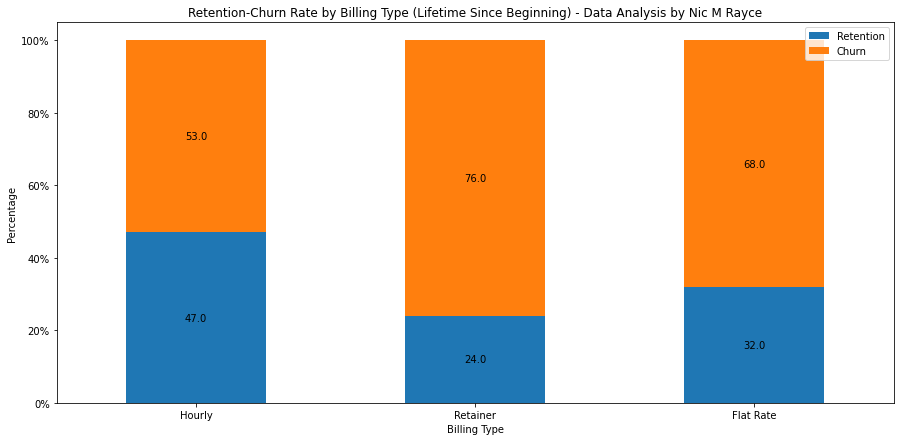

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

Retention = [47, 24, 32]
Churn = [53, 76, 68]

# pandas dataframe
df = pd.DataFrame(data={"Retention": Retention, "Churn": Churn})
df.index = ["Hourly", "Retainer", "Flat Rate"]

ax = df.plot(
    kind="bar",
    stacked=True,
    figsize=(15, 7),
    rot=0,
    xlabel="Billing Type",
    ylabel="Percentage",
    title="Retention-Churn Rate by Billing Type (Lifetime Since Beginning) - Data Analysis by Nic M Rayce",
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else "" for v in c]

    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type="center")


In [21]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query9b = """
    with project_length as 
    (SELECT
    selectsystems.record_id,
    cast(selectsystems.created as date),
    selectsystems.status,
    selectsystems.billing_style as "Billing Style",
    cast(now() as date) - cast(selectsystems.created as date) as "Period"
    FROM 
    selectsystems 
    WHERE selectsystems.status = 'Active')
    
    SELECT cast(case when "project_length"."Period" >= 0 and "project_length"."Period" <= 30    then '  1'
            when "project_length"."Period" > 30 and "project_length"."Period" <= 60   then ' 2'
            when "project_length"."Period" > 60 and "project_length"."Period" <= 90  then ' 3'
            when "project_length"."Period" > 90 and "project_length"."Period" <= 120   then ' 4'
            when "project_length"."Period" > 120 and "project_length"."Period" <= 150  then ' 5'
            when "project_length"."Period" > 150 and "project_length"."Period" <= 180  then ' 6'
            when "project_length"."Period" > 180 and "project_length"."Period" <= 210    then ' 7'
            when "project_length"."Period" > 210 and "project_length"."Period" <= 240   then ' 8'
            when "project_length"."Period" > 240 and "project_length"."Period" <= 270  then ' 9'
            when "project_length"."Period" > 270 and "project_length"."Period" <= 300   then ' 10'
            when "project_length"."Period" > 300 and "project_length"."Period" <= 330  then ' 11'
            when "project_length"."Period" > 330 and "project_length"."Period" <= 365  then ' 12'
            else '13' end as integer) as "Length of Projects",
            count(*) as "Number of Projects"
            FROM project_length
            GROUP BY 1
            ORDER BY 1

"""
dataset9b = sqlio.read_sql_query(query9b,conn)
df9b = pd.DataFrame(data=dataset9b)
df9b.to_csv('analysis9b.csv')
print(df9b)


    Length of Projects  Number of Projects
0                    1                  26
1                    2                  13
2                    3                   6
3                    4                  11
4                    5                  10
5                    6                   1
6                    7                   4
7                    8                   6
8                    9                   3
9                   10                   6
10                  13                   1


In [21]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query13 = """
    
    WITH scenario_1 AS
    (SELECT
    experts.name as "Name",
    cast(experts.status_last_modified as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'No Longer%'
    ORDER BY experts.name, experts.created ASC)
      
      , scenario_2 AS 
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.status_last_modified as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Send Wel%' and experts.status like 'Available%'
    ORDER BY experts.name, experts.created ASC)
    
    , scenario_3 AS
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'At Ca%'
    ORDER BY experts.name, experts.created ASC)

      , combined AS 
      (SELECT * from scenario_1 UNION SELECT * from scenario_2 UNION SELECT * from scenario_3)
      

SELECT cast(case when "combined"."Period" >= 0 and "combined"."Period" <= 30    then '  1'
            when "combined"."Period" > 30 and "combined"."Period" <= 60   then ' 2'
            when "combined"."Period" > 60 and "combined"."Period" <= 90  then ' 3'
            when "combined"."Period" > 90 and "combined"."Period" <= 120   then ' 4'
            when "combined"."Period" > 120 and "combined"."Period" <= 150  then ' 5'
            when "combined"."Period" > 150 and "combined"."Period" <= 180  then ' 6'
            when "combined"."Period" > 180 and "combined"."Period" <= 210    then ' 7'
            when "combined"."Period" > 210 and "combined"."Period" <= 240   then ' 8'
            when "combined"."Period" > 240 and "combined"."Period" <= 270  then ' 9'
            when "combined"."Period" > 270 and "combined"."Period" <= 300   then ' 10'
            when "combined"."Period" > 300 and "combined"."Period" <= 330  then ' 11'
            when "combined"."Period" > 330 and "combined"."Period" <= 365  then ' 12'
            else '13' end as integer) as "Monthly Period",
            count(*) as "Number of Experts"
            FROM combined
            GROUP BY 1

"""
dataset13 = sqlio.read_sql_query(query13,conn)
df13 = pd.DataFrame(data=dataset13)
df13.to_csv('analysis13.csv')
print(df13)


    Monthly Period  Number of Experts
0                1                 27
1                2                 47
2                3                 34
3                4                 35
4                5                 39
5                6                 17
6                7                 47
7                8                 43
8                9                 33
9               10                 62
10              11                 81
11              12                  8
12              13                 17


In [22]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
df = pd.read_csv('retention_data.csv')
print(df)

    Month Retention Rate
0       0           100%
1       1            94%
2       2            85%
3       3            78%
4       4            71%
5       5            63%
6       6            59%
7       7            50%
8       8            41%
9       9            34%
10     10            22%
11     11             5%
12     12             3%


    Monthly Period  Number of Experts
0                1                 29
1                2                 47
2                3                 34
3                4                 35
4                5                 39
5                6                 17
6                7                 47
7                8                 43
8                9                 33
9               10                 62
10              11                 81
11              12                  8
12              13                 17
    Month  Retention Rate
0       0          100.00
1       1           94.49
2       2           84.90
3       3           77.96
4       4           70.82
5       5           62.86
6       6           59.39
7       7           49.80
8       8           41.02
9       9           34.29
10     10           21.63
11     11            5.10
12     12            3.47


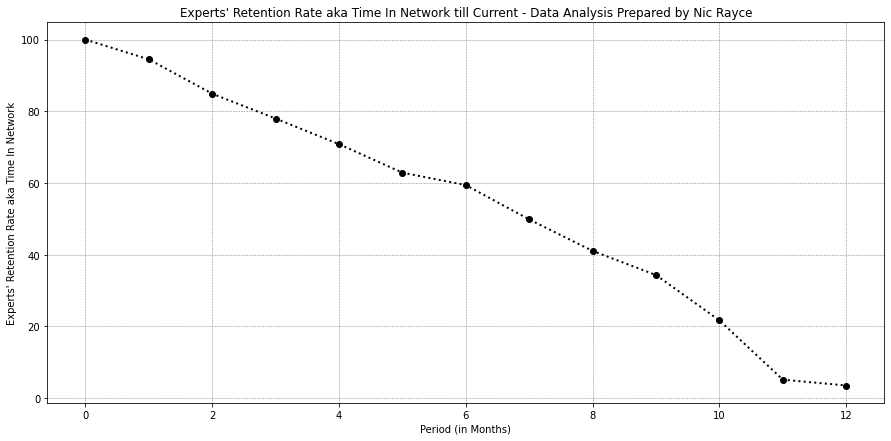

In [26]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")

query13 = """
    
    WITH scenario_1 AS
    (SELECT
    experts.name as "Name",
    cast(experts.status_last_modified as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'No Longer%'
    ORDER BY experts.name, experts.created ASC)
      
      , scenario_2 AS 
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.status_last_modified as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Send Wel%' and experts.status like 'Available%'
    ORDER BY experts.name, experts.created ASC)
    
    , scenario_3 AS
    (SELECT
    experts.name as "Name",
    cast(now() as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
    WHERE experts.previous_status like 'Available%' and experts.status like 'At Ca%'
    ORDER BY experts.name, experts.created ASC)

      , combined AS 
      (SELECT * from scenario_1 UNION SELECT * from scenario_2 UNION SELECT * from scenario_3)
      

SELECT cast(case when "combined"."Period" >= 0 and "combined"."Period" <= 30    then '  1'
            when "combined"."Period" > 30 and "combined"."Period" <= 60   then ' 2'
            when "combined"."Period" > 60 and "combined"."Period" <= 90  then ' 3'
            when "combined"."Period" > 90 and "combined"."Period" <= 120   then ' 4'
            when "combined"."Period" > 120 and "combined"."Period" <= 150  then ' 5'
            when "combined"."Period" > 150 and "combined"."Period" <= 180  then ' 6'
            when "combined"."Period" > 180 and "combined"."Period" <= 210    then ' 7'
            when "combined"."Period" > 210 and "combined"."Period" <= 240   then ' 8'
            when "combined"."Period" > 240 and "combined"."Period" <= 270  then ' 9'
            when "combined"."Period" > 270 and "combined"."Period" <= 300   then ' 10'
            when "combined"."Period" > 300 and "combined"."Period" <= 330  then ' 11'
            when "combined"."Period" > 330 and "combined"."Period" <= 365  then ' 12'
            else '13' end as integer) as "Monthly Period",
            count(*) as "Number of Experts"
            FROM combined
            GROUP BY 1

"""
dataset13 = sqlio.read_sql_query(query13,conn)
df13 = pd.DataFrame(data=dataset13)
df13.to_csv('analysis13.csv')
print(df13)

df14 = pd.read_csv('retention_data.csv')
print(df14)

# Define Data
xdata1=df14['Month']
ydata1=df14['Retention Rate']
xdata2=df13['Monthly Period']
ydata2=df13['Number of Experts']


# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', color ='black', linewidth=2)
plt.title("Experts' Retention Rate aka Time In Network till Current - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Period (in Months)')
plt.ylabel("Experts' Retention Rate aka Time In Network")
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.show()

    Percentage of Active Experts - ALL        Registration Month
0                             0.000000 2022-06-01 00:00:00+00:00
1                             6.451613 2022-05-01 00:00:00+00:00
2                            18.032787 2022-04-01 00:00:00+00:00
3                             8.000000 2022-03-01 00:00:00+00:00
4                             7.692308 2022-02-01 00:00:00+00:00
5                            10.526316 2022-01-01 00:00:00+00:00
6                             2.380952 2021-12-01 00:00:00+00:00
7                            10.526316 2021-11-01 00:00:00+00:00
8                            23.076923 2021-10-01 00:00:00+00:00
9                            12.195122 2021-09-01 00:00:00+00:00
10                           27.500000 2021-08-01 00:00:00+00:00
11                           17.000000 2021-07-01 00:00:00+00:00
12                           53.333333 2021-06-01 00:00:00+00:00
13                           58.333333 2021-05-01 00:00:00+00:00
14                       

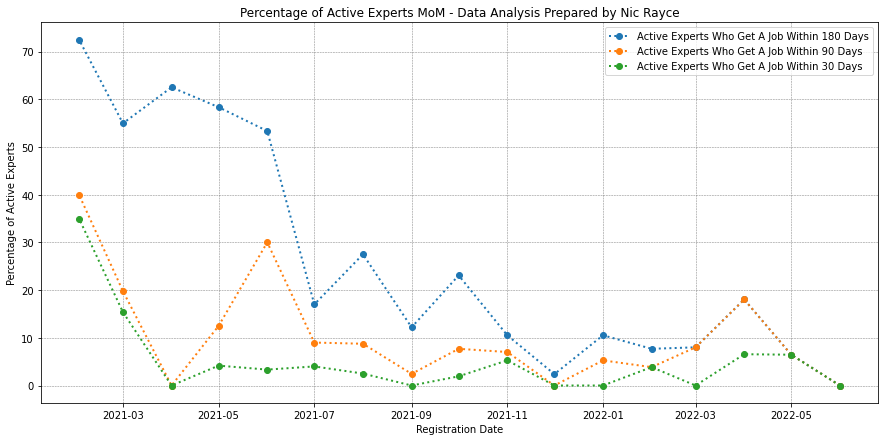

In [14]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
    SELECT 
  cast(
    sum(
      CASE WHEN "source"."ID" IS NOT NULL THEN 1 ELSE 0 END
    ) as float
  ) / count(*) * 100 AS "Percentage of Active Experts - ALL" , date_trunc('month', cast("source"."Date" as date)) as "Registration Month"
  FROM 
    (SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      experts.created as "Date"
    FROM 
      experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', cast("source"."Date" as date))
      ORDER BY date_trunc('month', cast("source"."Date" as date)) DESC
      """
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

query6 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 30 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 30 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset6 = sqlio.read_sql_query(query6,conn)
df6 = pd.DataFrame(data=dataset6)
print(df6)

query7 = """
    SELECT 
    cast(sum(CASE WHEN "source"."ID" IS NOT NULL AND 
    "source"."Period" <= 90 THEN 1 ELSE 0 END) as float) / count (*) * 100 AS "Percentage of Active Experts within 90 Days", 
    date_trunc('month', "source"."Registration Date") as "Registration Month"
  FROM
(SELECT 
      selectsystems.record_id as "ID", 
      experts.name,
      cast (experts.created as date) as "Registration Date",
      selectsystems.created as "Job Onboarding Date",
      cast(selectsystems.created as date) - cast(experts.created as date) as "Period"
    FROM 
    experts 
      LEFT JOIN selectsystems 
      ON selectsystems.expert = experts.id)"source"
      GROUP BY date_trunc('month', "source"."Registration Date")
      ORDER BY date_trunc('month', "source"."Registration Date") DESC
      """
dataset7 = sqlio.read_sql_query(query7,conn)
df7 = pd.DataFrame(data=dataset7)
print(df7)


# Define Data
xdata1=df5['Registration Month']
ydata1=df5['Percentage of Active Experts - ALL']
xdata2=df7['Registration Month']
ydata2=df7['Percentage of Active Experts within 90 Days']
xdata3=df6['Registration Month']
ydata3=df6['Percentage of Active Experts within 30 Days']

    
# Plot
plt.figure(figsize=(15, 7))
plt.plot(xdata1, ydata1, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata2, ydata2, 'o', linestyle = 'dotted', linewidth=2)
plt.plot(xdata3, ydata3, 'o', linestyle = 'dotted', linewidth=2)
plt.legend(['Active Experts Who Get A Job Within 180 Days', 'Active Experts Who Get A Job Within 90 Days' ,'Active Experts Who Get A Job Within 30 Days'])
plt.title("Percentage of Active Experts MoM - Data Analysis Prepared by Nic Rayce")
plt.xlabel('Registration Date')
plt.ylabel('Percentage of Active Experts')
ax = plt.subplot()
ax.grid(color='grey', linestyle='dashed', linewidth=0.5)

plt.show()
